# ML Project
1. Import libraries
2. Load Data
3. Modify Data
4. EDA
5. Feature Selection
6. Preprocessing
7. Model Selection
8. Analysis
9. Inference

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load Data

In [2]:
electric_gen_df = pd.read_csv('https://catalog.eppo.go.th/dataset/cc2df961-bc3c-42bd-a423-14d533932c6c/resource/738041df-8e3d-4548-891f-3becece157d2/download/dataset_11_31.csv')

In [3]:
power_gen_df = pd.read_csv('https://catalog.eppo.go.th/dataset/bfdfabd4-b67f-4aee-b0e9-cfbb418a59c0/resource/edd5d4f8-f32e-4366-8573-52ba242c6bd1/download/dataset_11_27.csv')

In [4]:
emission_df = pd.read_csv('https://catalog.eppo.go.th/dataset/512aa812-f4f6-4481-9f9e-c3fe30643b63/resource/e95b7777-058b-4099-a1f3-e6d5ef60a732/download/dataset_11_62.csv')

## 3. Modify Data

Dataset: การใช้เชื้อเพลิงในการผลิตไฟฟ้าของ กฟผ.

In [5]:
electric_gen_df.head()

Year     Month    Fuel Ttpe  Quantity   UNIT
0  1986   January  NATURAL GAS   8125.86  MMSCF
1  1986  February  NATURAL GAS   6895.85  MMSCF
2  1986     March  NATURAL GAS   8260.35  MMSCF
3  1986     April  NATURAL GAS   7423.69  MMSCF
4  1986       May  NATURAL GAS   8244.17  MMSCF

In [6]:
electric_gen_df.rename(columns={'Fuel Ttpe': 'Fuel Type'}, inplace=True)

In [7]:
electric_gen_df.head()

Year     Month    Fuel Type  Quantity   UNIT
0  1986   January  NATURAL GAS   8125.86  MMSCF
1  1986  February  NATURAL GAS   6895.85  MMSCF
2  1986     March  NATURAL GAS   8260.35  MMSCF
3  1986     April  NATURAL GAS   7423.69  MMSCF
4  1986       May  NATURAL GAS   8244.17  MMSCF

In [8]:
electric_gen_df['Fuel Type'].unique()

array(['NATURAL GAS', 'LIGNITE', 'DIESEL OIL', 'FUEL OIL', 'PALM OIL'],
      dtype=object)

In [9]:
pivot_electric_gen_df = electric_gen_df.pivot_table(
    index=['Year', 'Month'], 
    columns='Fuel Type', 
    values='Quantity',
)

# Reset index to make 'Year' and 'Month' regular columns
pivot_electric_gen_df.reset_index(inplace=True)

# Drop the unnecessary 'Fuel Type' level in the columns and rename
pivot_electric_gen_df.columns.name = None  # Remove the 'Fuel Type' name from the columns

pivot_electric_gen_df

Year     Month  DIESEL OIL   FUEL OIL   LIGNITE  NATURAL GAS  PALM OIL
0    1986     April    0.537000  86.436000   273.687     7423.690       NaN
1    1986    August    0.434000  66.373000   428.256     7370.100       NaN
2    1986  December    0.374000  68.509000   518.620     8784.050       NaN
3    1986  February    1.056000  77.013000   278.687     6895.850       NaN
4    1986   January    0.520000  54.575000   438.482     8125.860       NaN
..    ...       ...         ...        ...       ...          ...       ...
458  2024   January    0.413018   0.000000  1022.443    33512.763       NaN
459  2024      July    6.400631   0.000000  1029.043    28848.165       NaN
460  2024      June    0.886987   0.000000  1053.415    30058.858       NaN
461  2024     March    1.031234   0.000000  1086.090    36909.817       NaN
462  2024       May    1.131571   2.939805  1105.556    35149.500       NaN

[463 rows x 7 columns]

In [10]:
# Month Order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure 'Month' column is a categorical type with the correct order
pivot_electric_gen_df['Month'] = pd.Categorical(pivot_electric_gen_df['Month'], categories=month_order, ordered=True)

# Sort by 'Year' and 'Month'
pivot_electric_gen_df.sort_values(by=['Year', 'Month'], inplace=True)

pivot_electric_gen_df

Year     Month  DIESEL OIL   FUEL OIL   LIGNITE  NATURAL GAS  PALM OIL
4    1986   January    0.520000  54.575000   438.482     8125.860       NaN
3    1986  February    1.056000  77.013000   278.687     6895.850       NaN
7    1986     March    2.446000  61.806000   268.723     8260.350       NaN
0    1986     April    0.537000  86.436000   273.687     7423.690       NaN
8    1986       May    0.552000  79.655000   323.138     8244.170       NaN
..    ...       ...         ...        ...       ...          ...       ...
461  2024     March    1.031234   0.000000  1086.090    36909.817       NaN
456  2024     April    0.719586   0.000000  1044.680    33653.353       NaN
462  2024       May    1.131571   2.939805  1105.556    35149.500       NaN
460  2024      June    0.886987   0.000000  1053.415    30058.858       NaN
459  2024      July    6.400631   0.000000  1029.043    28848.165       NaN

[463 rows x 7 columns]

In [11]:
pivot_electric_gen_df.rename(columns={
    'DIESEL OIL': 'Disel_Oil_m.litres',
    'FUEL OIL': 'Fuel_Oil_m.litres',
    'LIGNITE': 'Lignite_1k_ton',
    'NATURAL GAS': 'Natural_Gas_mmscf',
    'PALM OIL': 'Palm_Oil_m.litres'}, inplace=True)

In [12]:
pivot_electric_gen_df

Year     Month  Disel_Oil_m.litres  Fuel_Oil_m.litres  Lignite_1k_ton  \
4    1986   January            0.520000          54.575000         438.482   
3    1986  February            1.056000          77.013000         278.687   
7    1986     March            2.446000          61.806000         268.723   
0    1986     April            0.537000          86.436000         273.687   
8    1986       May            0.552000          79.655000         323.138   
..    ...       ...                 ...                ...             ...   
461  2024     March            1.031234           0.000000        1086.090   
456  2024     April            0.719586           0.000000        1044.680   
462  2024       May            1.131571           2.939805        1105.556   
460  2024      June            0.886987           0.000000        1053.415   
459  2024      July            6.400631           0.000000        1029.043   

     Natural_Gas_mmscf  Palm_Oil_m.litres  
4             8125.860                NaN  
3             6895.850                NaN  
7             8260.350                NaN  
0             7423.690                NaN  
8             8244.170                NaN  
..                 ...                ...  
461          36909.817                NaN  
456          33653.353                NaN  
462          35149.500                NaN  
460          30058.858                NaN  
459          28848.165                NaN  

[463 rows x 7 columns]

Dataset: การผลิตไฟฟ้าแยกตามชนิดเชื้อเพลิง

In [13]:
power_gen_df.head()

Year     MONTH          Fuel Type  Quantity UNIT
0  1986   January  Hydro Electricity    218.90  GWh
1  1986  February  Hydro Electricity    391.76  GWh
2  1986     March  Hydro Electricity    629.74  GWh
3  1986     April  Hydro Electricity    633.91  GWh
4  1986       May  Hydro Electricity    498.05  GWh

In [14]:
power_gen_df.rename(columns={'MONTH': 'Month'}, inplace=True)

In [15]:
power_gen_df

Year     Month          Fuel Type    Quantity UNIT
0     1986   January  Hydro Electricity  218.900000  GWh
1     1986  February  Hydro Electricity  391.760000  GWh
2     1986     March  Hydro Electricity  629.740000  GWh
3     1986     April  Hydro Electricity  633.910000  GWh
4     1986       May  Hydro Electricity  498.050000  GWh
...    ...       ...                ...         ...  ...
3215  2024      July     Coal & Lignite   12.954298  GWh
3216  2024      July        Natural Gas   55.139539  GWh
3217  2024      July             Diesel    0.168388  GWh
3218  2024      July           Imported   19.582340  GWh
3219  2024      July   Renewable Energy   10.040885  GWh

[3220 rows x 5 columns]

In [16]:
pivot_power_gen_df = power_gen_df.pivot_table(
    index=['Year', 'Month'], 
    columns='Fuel Type', 
    values='Quantity',
)

# Reset index to make 'Year' and 'Month' regular columns
pivot_power_gen_df.reset_index(inplace=True)

# Drop the unnecessary 'Fuel Type' level in the columns and rename
pivot_power_gen_df.columns.name = None  # Remove the 'Fuel Type' name from the columns

pivot_power_gen_df

Year     Month  Coal & Lignite    Diesel  Fuel Oil  Hydro Electricity  \
0    1986     April      336.140000  0.490000    333.95         633.910000   
1    1986    August      517.400000  0.380000    246.90         542.000000   
2    1986  December      589.380000  0.090000    265.77         229.090000   
3    1986  February      323.550000  2.050000    288.67         391.760000   
4    1986   January      512.630000  0.190000    229.46         218.900000   
..    ...       ...             ...       ...       ...                ...   
458  2024   January     2596.178616  1.497000      0.00         649.653000   
459  2024      July       12.954298  0.168388      0.00           2.114554   
460  2024      June     2478.963325  3.476000      0.00         485.647000   
461  2024     March     3056.239817  3.805000      0.00         648.986000   
462  2024       May     3012.505365  4.492000     10.78         646.737000   

       Imported   Natural Gas  Renewable Energy  
0      33.79000    817.250000               NaN  
1      91.24000    800.960000               NaN  
2      43.00000    966.210000               NaN  
3      52.14000    755.350000               NaN  
4      57.00000    880.340000               NaN  
..          ...           ...               ...  
458  2143.29200  10801.564440       2058.437464  
459    19.58234     55.139539         10.040885  
460  2853.09100  12301.857730       1956.249964  
461  2687.75100  12990.405050       2041.311809  
462  2691.00700  13563.087020       1928.082576  

[463 rows x 9 columns]

In [17]:
# Month Order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure 'Month' column is a categorical type with the correct order
pivot_power_gen_df['Month'] = pd.Categorical(pivot_power_gen_df['Month'], categories=month_order, ordered=True)

# Sort by 'Year' and 'Month'
pivot_power_gen_df.sort_values(by=['Year', 'Month'], inplace=True)

pivot_power_gen_df

Year     Month  Coal & Lignite    Diesel  Fuel Oil  Hydro Electricity  \
4    1986   January      512.630000  0.190000    229.46         218.900000   
3    1986  February      323.550000  2.050000    288.67         391.760000   
7    1986     March      331.950000  4.970000    227.37         629.740000   
0    1986     April      336.140000  0.490000    333.95         633.910000   
8    1986       May      404.260000  0.640000    302.11         498.050000   
..    ...       ...             ...       ...       ...                ...   
461  2024     March     3056.239817  3.805000      0.00         648.986000   
456  2024     April     2949.052335  2.586000      0.00         672.547000   
462  2024       May     3012.505365  4.492000     10.78         646.737000   
460  2024      June     2478.963325  3.476000      0.00         485.647000   
459  2024      July       12.954298  0.168388      0.00           2.114554   

       Imported   Natural Gas  Renewable Energy  
4      57.00000    880.340000               NaN  
3      52.14000    755.350000               NaN  
7      41.86000    899.540000               NaN  
0      33.79000    817.250000               NaN  
8      47.28000    900.010000               NaN  
..          ...           ...               ...  
461  2687.75100  12990.405050       2041.311809  
456  2854.62900  13252.440610       2077.745447  
462  2691.00700  13563.087020       1928.082576  
460  2853.09100  12301.857730       1956.249964  
459    19.58234     55.139539         10.040885  

[463 rows x 9 columns]

In [18]:
pivot_power_gen_df.rename(columns={
    'Coal & Lignite': 'Coal_Lignite_GWh',
    'Diesel': 'Diesel_GWh',
    'Fuel Oil': 'Fuel_Oil_GWh',
    'Hydro Electricity': 'Hydro_Elec_GWh',
    'Imported': 'Imported_GWh',
    'Natural Gas': 'Natural_Gas_GWh',
    'Renewable Energy': 'Renewable_GWh'}, inplace=True)

In [19]:
pivot_power_gen_df

Year     Month  Coal_Lignite_GWh  Diesel_GWh  Fuel_Oil_GWh  \
4    1986   January        512.630000    0.190000        229.46   
3    1986  February        323.550000    2.050000        288.67   
7    1986     March        331.950000    4.970000        227.37   
0    1986     April        336.140000    0.490000        333.95   
8    1986       May        404.260000    0.640000        302.11   
..    ...       ...               ...         ...           ...   
461  2024     March       3056.239817    3.805000          0.00   
456  2024     April       2949.052335    2.586000          0.00   
462  2024       May       3012.505365    4.492000         10.78   
460  2024      June       2478.963325    3.476000          0.00   
459  2024      July         12.954298    0.168388          0.00   

     Hydro_Elec_GWh  Imported_GWh  Natural_Gas_GWh  Renewable_GWh  
4        218.900000      57.00000       880.340000            NaN  
3        391.760000      52.14000       755.350000            NaN  
7        629.740000      41.86000       899.540000            NaN  
0        633.910000      33.79000       817.250000            NaN  
8        498.050000      47.28000       900.010000            NaN  
..              ...           ...              ...            ...  
461      648.986000    2687.75100     12990.405050    2041.311809  
456      672.547000    2854.62900     13252.440610    2077.745447  
462      646.737000    2691.00700     13563.087020    1928.082576  
460      485.647000    2853.09100     12301.857730    1956.249964  
459        2.114554      19.58234        55.139539      10.040885  

[463 rows x 9 columns]

Dataset: การปล่อย CO2 แยกตามชนิดเชื้อเพลิงในการผลิตไฟฟ้า

In [20]:
emission_df.head()

Year     Month Fuel Type  Quantity        UNIT
0  1987   January       Oil    179.68  1,000 Tons
1  1987  February       Oil    133.53  1,000 Tons
2  1987     March       Oil    145.80  1,000 Tons
3  1987     April       Oil    143.35  1,000 Tons
4  1987       May       Oil    168.65  1,000 Tons

In [21]:
pivot_emission_df = emission_df.pivot_table(
    index=['Year', 'Month'], 
    columns='Fuel Type', 
    values='Quantity',
)

# Reset index to make 'Year' and 'Month' regular columns
pivot_emission_df.reset_index(inplace=True)

# Drop the unnecessary 'Fuel Type' level in the columns and rename
pivot_emission_df.columns.name = None  # Remove the 'Fuel Type' name from the columns

pivot_emission_df

Year     Month  Coal/Lignite  Natural Gas     Oil
0    1987     April        554.95       586.91  143.35
1    1987    August        547.41       706.81  143.80
2    1987  December        454.12       680.61  156.22
3    1987  February        417.09       516.39  133.53
4    1987   January        513.29       510.66  179.68
..    ...       ...           ...          ...     ...
446  2024   January       2604.13      4535.03   66.03
447  2024      July       2479.34      4560.14   38.54
448  2024      June       2598.68      5133.65   37.23
449  2024     March       3041.34      5352.50   42.22
450  2024       May       2913.34      5598.33   40.74

[451 rows x 5 columns]

In [22]:
# Month Order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure 'Month' column is a categorical type with the correct order
pivot_emission_df['Month'] = pd.Categorical(pivot_emission_df['Month'], categories=month_order, ordered=True)

# Sort by 'Year' and 'Month'
pivot_emission_df.sort_values(by=['Year', 'Month'], inplace=True)

pivot_emission_df

Year     Month  Coal/Lignite  Natural Gas     Oil
4    1987   January        513.29       510.66  179.68
3    1987  February        417.09       516.39  133.53
7    1987     March        543.47       597.48  145.80
0    1987     April        554.95       586.91  143.35
8    1987       May       1096.98       669.35  168.65
..    ...       ...           ...          ...     ...
449  2024     March       3041.34      5352.50   42.22
444  2024     April       2969.23      5380.83   39.60
450  2024       May       2913.34      5598.33   40.74
448  2024      June       2598.68      5133.65   37.23
447  2024      July       2479.34      4560.14   38.54

[451 rows x 5 columns]

In [23]:
pivot_emission_df.rename(columns={
    'Coal/Lignite': 'Coal_Lignite_1k_tons',
    'Natural Gas': 'Natural_Gas_1k_tons',
    'Oil': 'Oil_1k_tons'}, inplace=True)

In [24]:
pivot_emission_df

Year     Month  Coal_Lignite_1k_tons  Natural_Gas_1k_tons  Oil_1k_tons
4    1987   January                513.29               510.66       179.68
3    1987  February                417.09               516.39       133.53
7    1987     March                543.47               597.48       145.80
0    1987     April                554.95               586.91       143.35
8    1987       May               1096.98               669.35       168.65
..    ...       ...                   ...                  ...          ...
449  2024     March               3041.34              5352.50        42.22
444  2024     April               2969.23              5380.83        39.60
450  2024       May               2913.34              5598.33        40.74
448  2024      June               2598.68              5133.65        37.23
447  2024      July               2479.34              4560.14        38.54

[451 rows x 5 columns]

In [25]:
pivot_emission_df['Total_Emission_1k_tons'] = (pivot_emission_df['Coal_Lignite_1k_tons'] +
                                                pivot_emission_df['Natural_Gas_1k_tons'] +
                                                pivot_emission_df['Oil_1k_tons'])

pivot_emission_df

Year     Month  Coal_Lignite_1k_tons  Natural_Gas_1k_tons  Oil_1k_tons  \
4    1987   January                513.29               510.66       179.68   
3    1987  February                417.09               516.39       133.53   
7    1987     March                543.47               597.48       145.80   
0    1987     April                554.95               586.91       143.35   
8    1987       May               1096.98               669.35       168.65   
..    ...       ...                   ...                  ...          ...   
449  2024     March               3041.34              5352.50        42.22   
444  2024     April               2969.23              5380.83        39.60   
450  2024       May               2913.34              5598.33        40.74   
448  2024      June               2598.68              5133.65        37.23   
447  2024      July               2479.34              4560.14        38.54   

     Total_Emission_1k_tons  
4                   1203.63  
3                   1067.01  
7                   1286.75  
0                   1285.21  
8                   1934.98  
..                      ...  
449                 8436.06  
444                 8389.66  
450                 8552.41  
448                 7769.56  
447                 7078.02  

[451 rows x 6 columns]

Merging 3 datasets

In [26]:
merged_df = pd.merge(pivot_electric_gen_df, pivot_power_gen_df, on=['Year', 'Month'], how='outer')
merged_df = pd.merge(merged_df, pivot_emission_df, on=['Year', 'Month'], how='outer')

merged_df

Year     Month  Disel_Oil_m.litres  Fuel_Oil_m.litres  Lignite_1k_ton  \
0    1986   January            0.520000          54.575000         438.482   
1    1986  February            1.056000          77.013000         278.687   
2    1986     March            2.446000          61.806000         268.723   
3    1986     April            0.537000          86.436000         273.687   
4    1986       May            0.552000          79.655000         323.138   
..    ...       ...                 ...                ...             ...   
458  2024     March            1.031234           0.000000        1086.090   
459  2024     April            0.719586           0.000000        1044.680   
460  2024       May            1.131571           2.939805        1105.556   
461  2024      June            0.886987           0.000000        1053.415   
462  2024      July            6.400631           0.000000        1029.043   

     Natural_Gas_mmscf  Palm_Oil_m.litres  Coal_Lignite_GWh  Diesel_GWh  \
0             8125.860                NaN        512.630000    0.190000   
1             6895.850                NaN        323.550000    2.050000   
2             8260.350                NaN        331.950000    4.970000   
3             7423.690                NaN        336.140000    0.490000   
4             8244.170                NaN        404.260000    0.640000   
..                 ...                ...               ...         ...   
458          36909.817                NaN       3056.239817    3.805000   
459          33653.353                NaN       2949.052335    2.586000   
460          35149.500                NaN       3012.505365    4.492000   
461          30058.858                NaN       2478.963325    3.476000   
462          28848.165                NaN         12.954298    0.168388   

     Fuel_Oil_GWh  Hydro_Elec_GWh  Imported_GWh  Natural_Gas_GWh  \
0          229.46      218.900000      57.00000       880.340000   
1          288.67      391.760000      52.14000       755.350000   
2          227.37      629.740000      41.86000       899.540000   
3          333.95      633.910000      33.79000       817.250000   
4          302.11      498.050000      47.28000       900.010000   
..            ...             ...           ...              ...   
458          0.00      648.986000    2687.75100     12990.405050   
459          0.00      672.547000    2854.62900     13252.440610   
460         10.78      646.737000    2691.00700     13563.087020   
461          0.00      485.647000    2853.09100     12301.857730   
462          0.00        2.114554      19.58234        55.139539   

     Renewable_GWh  Coal_Lignite_1k_tons  Natural_Gas_1k_tons  Oil_1k_tons  \
0              NaN                   NaN                  NaN          NaN   
1              NaN                   NaN                  NaN          NaN   
2              NaN                   NaN                  NaN          NaN   
3              NaN                   NaN                  NaN          NaN   
4              NaN                   NaN                  NaN          NaN   
..             ...                   ...                  ...          ...   
458    2041.311809               3041.34              5352.50        42.22   
459    2077.745447               2969.23              5380.83        39.60   
460    1928.082576               2913.34              5598.33        40.74   
461    1956.249964               2598.68              5133.65        37.23   
462      10.040885               2479.34              4560.14        38.54   

     Total_Emission_1k_tons  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
..                      ...  
458                 8436.06  
459                 8389.66  
460                 8552.41  
461                 7769.56  
462                 7078.02  

[463 rows x 18 columns]

In [27]:
#Change type of year and month to datetime. Set 'Date' as the index of the DataFrame

# Convert 'Month' column to string explicitly (in case it's a category type)
merged_df['Month'] = merged_df['Month'].astype(str)

# Combine 'Year' and 'Month' into a single 'Date' column (convert to datetime)
merged_df['Date'] = pd.to_datetime(merged_df['Year'].astype(str) + '-' + merged_df['Month'], format='%Y-%B')

# Set 'Date' as the index of the DataFrame
merged_df.set_index('Date', inplace=True)

In [28]:
merged_df.head()

Year     Month  Disel_Oil_m.litres  Fuel_Oil_m.litres  \
Date                                                                
1986-01-01  1986   January               0.520             54.575   
1986-02-01  1986  February               1.056             77.013   
1986-03-01  1986     March               2.446             61.806   
1986-04-01  1986     April               0.537             86.436   
1986-05-01  1986       May               0.552             79.655   

            Lignite_1k_ton  Natural_Gas_mmscf  Palm_Oil_m.litres  \
Date                                                               
1986-01-01         438.482            8125.86                NaN   
1986-02-01         278.687            6895.85                NaN   
1986-03-01         268.723            8260.35                NaN   
1986-04-01         273.687            7423.69                NaN   
1986-05-01         323.138            8244.17                NaN   

            Coal_Lignite_GWh  Diesel_GWh  Fuel_Oil_GWh  Hydro_Elec_GWh  \
Date                                                                     
1986-01-01            512.63        0.19        229.46          218.90   
1986-02-01            323.55        2.05        288.67          391.76   
1986-03-01            331.95        4.97        227.37          629.74   
1986-04-01            336.14        0.49        333.95          633.91   
1986-05-01            404.26        0.64        302.11          498.05   

            Imported_GWh  Natural_Gas_GWh  Renewable_GWh  \
Date                                                       
1986-01-01         57.00           880.34            NaN   
1986-02-01         52.14           755.35            NaN   
1986-03-01         41.86           899.54            NaN   
1986-04-01         33.79           817.25            NaN   
1986-05-01         47.28           900.01            NaN   

            Coal_Lignite_1k_tons  Natural_Gas_1k_tons  Oil_1k_tons  \
Date                                                                 
1986-01-01                   NaN                  NaN          NaN   
1986-02-01                   NaN                  NaN          NaN   
1986-03-01                   NaN                  NaN          NaN   
1986-04-01                   NaN                  NaN          NaN   
1986-05-01                   NaN                  NaN          NaN   

            Total_Emission_1k_tons  
Date                                
1986-01-01                     NaN  
1986-02-01                     NaN  
1986-03-01                     NaN  
1986-04-01                     NaN  
1986-05-01                     NaN

In [29]:
merged_df = merged_df[~merged_df['Year'].isin([1986, 2024])]

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 444 entries, 1987-01-01 to 2023-12-01
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    444 non-null    int64  
 1   Month                   444 non-null    object 
 2   Disel_Oil_m.litres      424 non-null    float64
 3   Fuel_Oil_m.litres       417 non-null    float64
 4   Lignite_1k_ton          444 non-null    float64
 5   Natural_Gas_mmscf       444 non-null    float64
 6   Palm_Oil_m.litres       16 non-null     float64
 7   Coal_Lignite_GWh        444 non-null    float64
 8   Diesel_GWh              444 non-null    float64
 9   Fuel_Oil_GWh            444 non-null    float64
 10  Hydro_Elec_GWh          444 non-null    float64
 11  Imported_GWh            444 non-null    float64
 12  Natural_Gas_GWh         444 non-null    float64
 13  Renewable_GWh           435 non-null    float64
 14  Coal_Lignite_1k_tons   

## 4. EDA

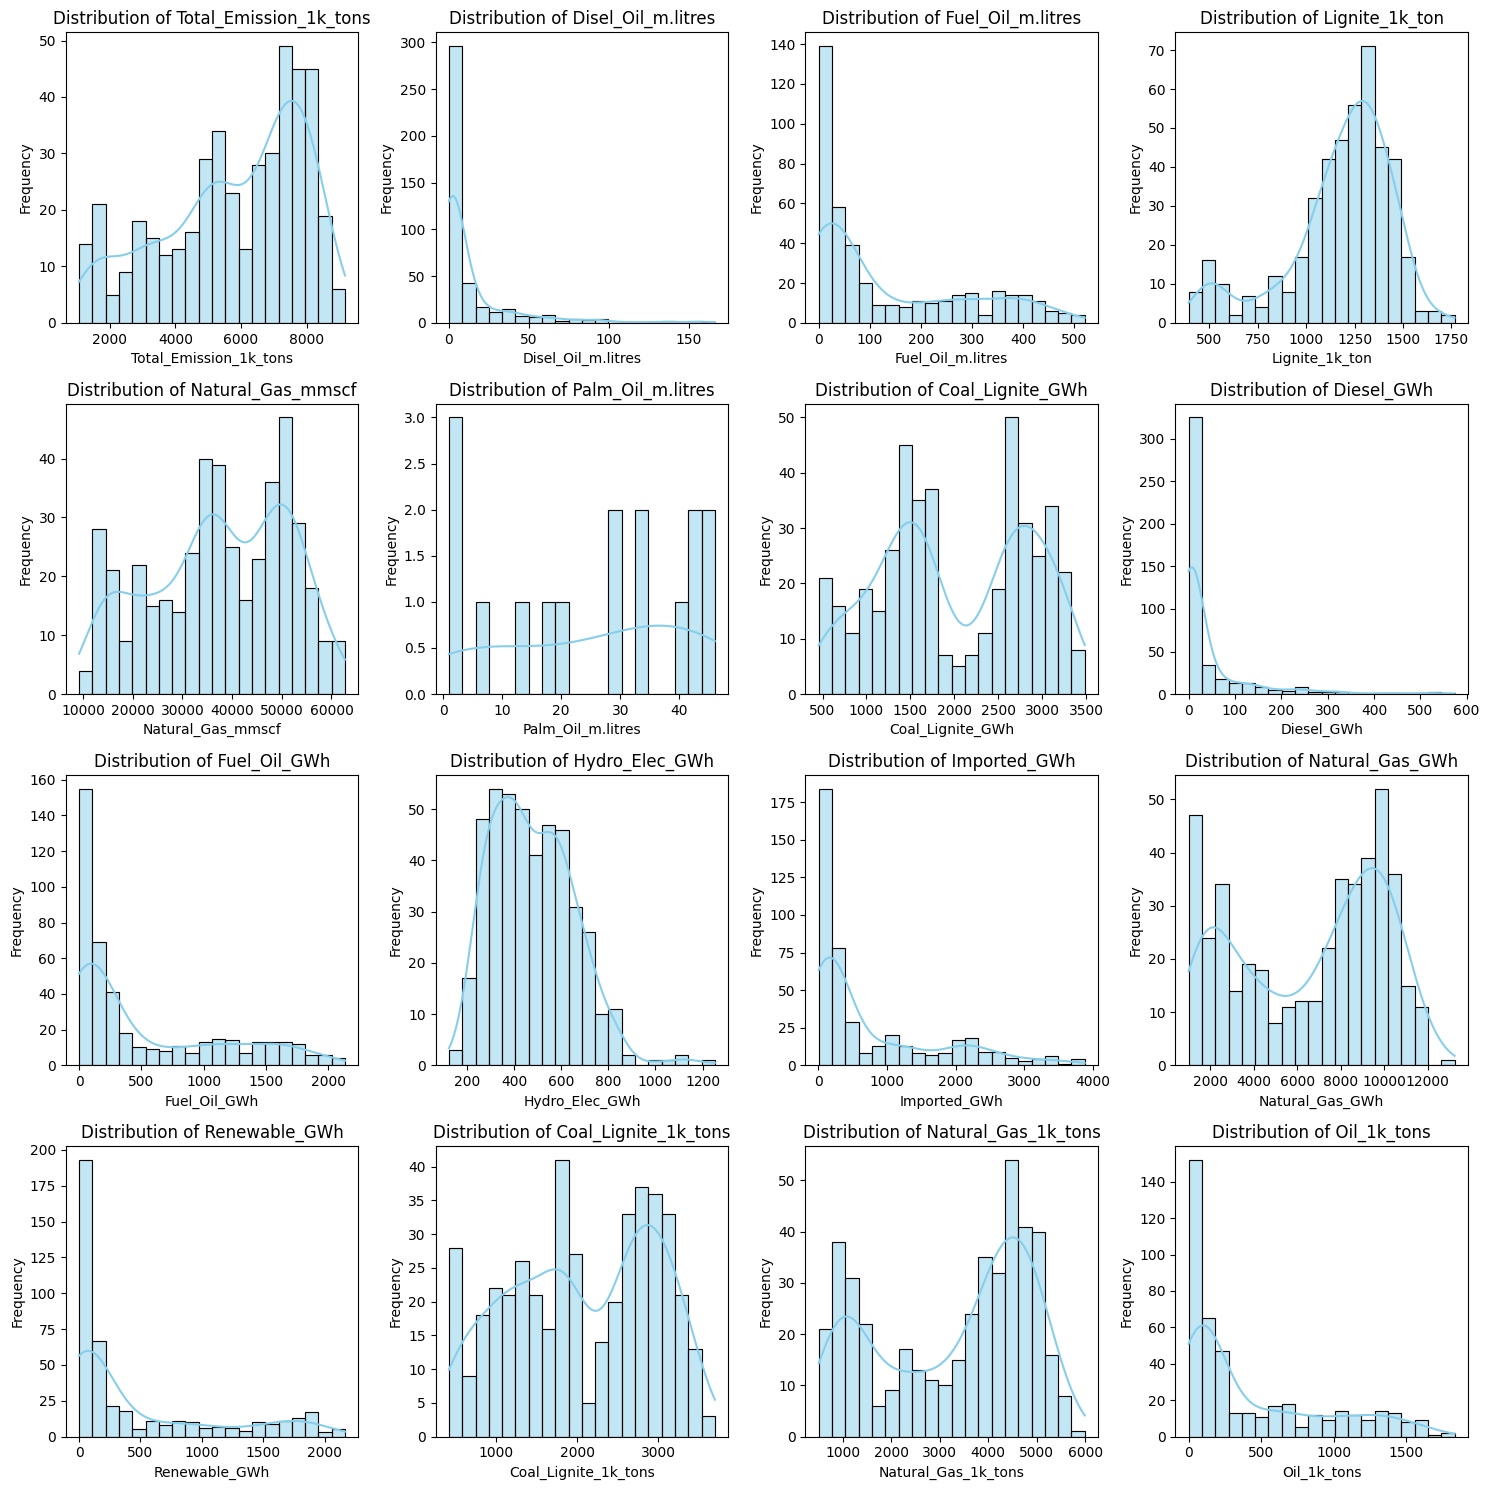

In [31]:
columns_to_plot = [
    'Total_Emission_1k_tons', 'Disel_Oil_m.litres', 'Fuel_Oil_m.litres', 'Lignite_1k_ton', 
    'Natural_Gas_mmscf', 'Palm_Oil_m.litres', 'Coal_Lignite_GWh', 'Diesel_GWh', 'Fuel_Oil_GWh', 
    'Hydro_Elec_GWh', 'Imported_GWh', 'Natural_Gas_GWh', 'Renewable_GWh', 
    'Coal_Lignite_1k_tons', 'Natural_Gas_1k_tons', 'Oil_1k_tons'
]

# Number of rows and columns
n_cols = 4
n_rows = 4

# Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(merged_df[column], kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

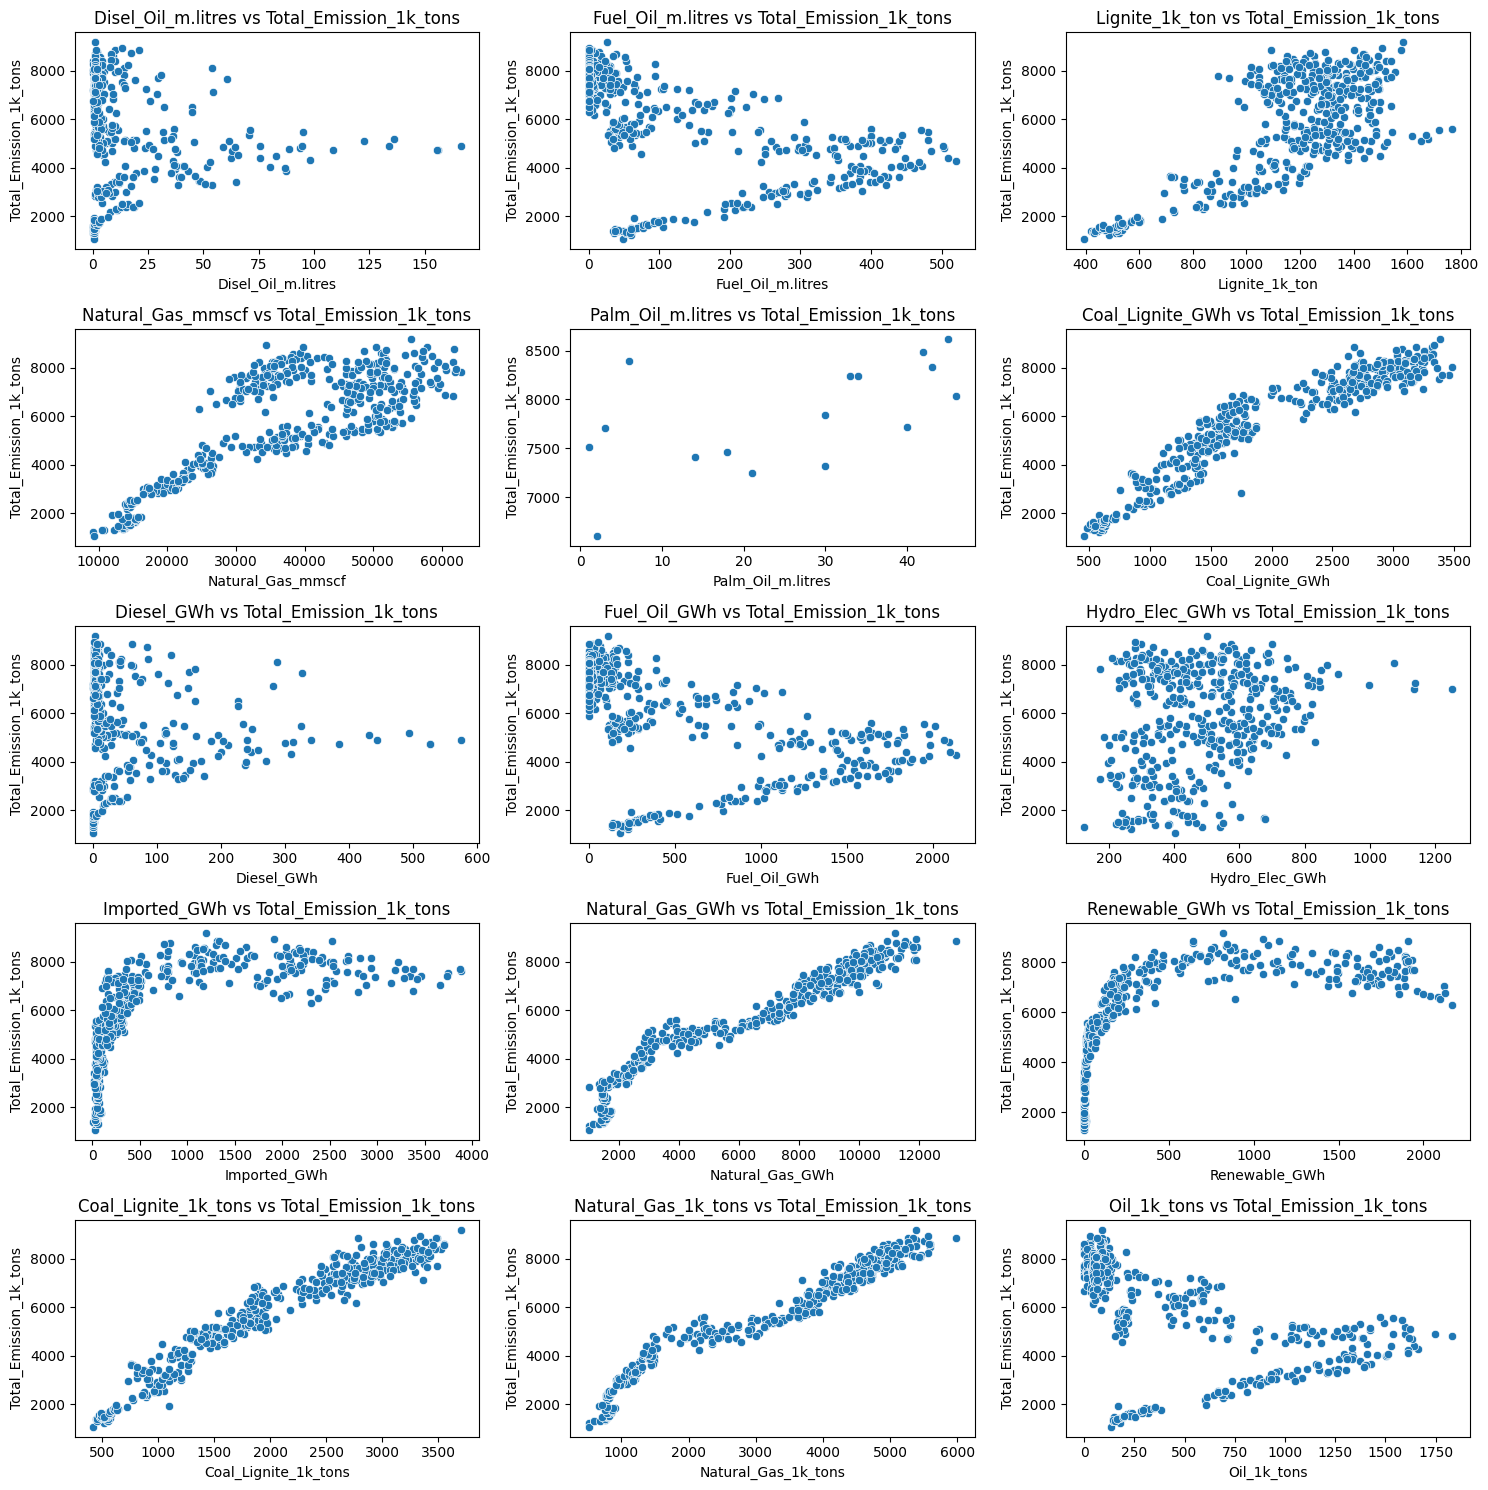

In [32]:
columns_to_plot = [
    'Disel_Oil_m.litres', 'Fuel_Oil_m.litres', 'Lignite_1k_ton', 
    'Natural_Gas_mmscf', 'Palm_Oil_m.litres', 'Coal_Lignite_GWh', 'Diesel_GWh', 'Fuel_Oil_GWh', 
    'Hydro_Elec_GWh', 'Imported_GWh', 'Natural_Gas_GWh', 'Renewable_GWh', 
    'Coal_Lignite_1k_tons', 'Natural_Gas_1k_tons', 'Oil_1k_tons'
]

# Number of rows and columns
n_cols = 3
n_rows = 5

# Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x=merged_df[column], y=merged_df['Total_Emission_1k_tons'], ax=axes[i])
    axes[i].set_title(f'{column} vs Total_Emission_1k_tons')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Total_Emission_1k_tons')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Date Time Analysis

In [33]:
df_scale = merged_df.copy()

In [34]:
#Scale power generation
df_scale['Coal_Lignite_GWh'] = merged_df['Coal_Lignite_GWh'] / merged_df['Coal_Lignite_GWh'].max(skipna=True)
df_scale['Fuel_Oil_GWh'] = merged_df['Fuel_Oil_GWh'] / merged_df['Fuel_Oil_GWh'].max(skipna=True)
df_scale['Hydro_Elec_GWh'] = merged_df['Hydro_Elec_GWh'] / merged_df['Hydro_Elec_GWh'].max(skipna=True)
df_scale['Natural_Gas_GWh'] = merged_df['Natural_Gas_GWh'] / merged_df['Natural_Gas_GWh'].max(skipna=True)
df_scale['Renewable_GWh'] = merged_df['Renewable_GWh'] / merged_df['Renewable_GWh'].max(skipna=True)
df_scale['Imported_GWh'] = merged_df['Imported_GWh'] / merged_df['Imported_GWh'].max(skipna=True)

#Scale CO2 emission of each fuel types
df_scale['Coal_Lignite_1k_tons'] = merged_df['Coal_Lignite_1k_tons'] / merged_df['Coal_Lignite_1k_tons'].max(skipna=True)
df_scale['Natural_Gas_1k_tons'] = merged_df['Natural_Gas_1k_tons'] / merged_df['Natural_Gas_1k_tons'].max(skipna=True)
df_scale['Oil_1k_tons'] = merged_df['Oil_1k_tons'] / merged_df['Oil_1k_tons'].max(skipna=True)

#Scale fuel types
df_scale['Fuel_Oil_m.litres'] = merged_df['Fuel_Oil_m.litres'] / merged_df['Fuel_Oil_m.litres'].max(skipna=True)
df_scale['Lignite_1k_ton'] = merged_df['Lignite_1k_ton'] / merged_df['Lignite_1k_ton'].max(skipna=True)
df_scale['Natural_Gas_mmscf'] = merged_df['Natural_Gas_mmscf'] / merged_df['Natural_Gas_mmscf'].max(skipna=True)

#Scale total CO2 emission
df_scale['Total_Emission_1k_tons'] = merged_df['Total_Emission_1k_tons'] / merged_df['Total_Emission_1k_tons'].max(skipna=True)

In [35]:
df_scale.head()

Year     Month  Disel_Oil_m.litres  Fuel_Oil_m.litres  \
Date                                                                
1987-01-01  1987   January               0.339           0.114762   
1987-02-01  1987  February               0.295           0.093030   
1987-03-01  1987     March               0.405           0.069648   
1987-04-01  1987     April               0.211           0.100587   
1987-05-01  1987       May               0.291           0.122407   

            Lignite_1k_ton  Natural_Gas_mmscf  Palm_Oil_m.litres  \
Date                                                               
1987-01-01        0.275036           0.146249                NaN   
1987-02-01        0.223487           0.147890                NaN   
1987-03-01        0.291208           0.171114                NaN   
1987-04-01        0.297356           0.168085                NaN   
1987-05-01        0.294339           0.191695                NaN   

            Coal_Lignite_GWh  Diesel_GWh  Fuel_Oil_GWh  Hydro_Elec_GWh  \
Date                                                                     
1987-01-01          0.166370        0.21      0.106642        0.212178   
1987-02-01          0.131348        0.15      0.085356        0.321501   
1987-03-01          0.175453        0.57      0.064163        0.432533   
1987-04-01          0.171763        0.17      0.092326        0.387363   
1987-05-01          0.165457        0.20      0.114900        0.326820   

            Imported_GWh  Natural_Gas_GWh  Renewable_GWh  \
Date                                                       
1987-01-01      0.010115         0.076573            NaN   
1987-02-01      0.008542         0.076652            NaN   
1987-03-01      0.008145         0.086922            NaN   
1987-04-01      0.008936         0.085711            NaN   
1987-05-01      0.007727         0.095794            NaN   

            Coal_Lignite_1k_tons  Natural_Gas_1k_tons  Oil_1k_tons  \
Date                                                                 
1987-01-01              0.138857             0.085309     0.098125   
1987-02-01              0.112833             0.086266     0.072922   
1987-03-01              0.147022             0.099813     0.079623   
1987-04-01              0.150127             0.098047     0.078285   
1987-05-01              0.296759             0.111819     0.092102   

            Total_Emission_1k_tons  
Date                                
1987-01-01                0.131283  
1987-02-01                0.116382  
1987-03-01                0.140350  
1987-04-01                0.140182  
1987-05-01                0.211054

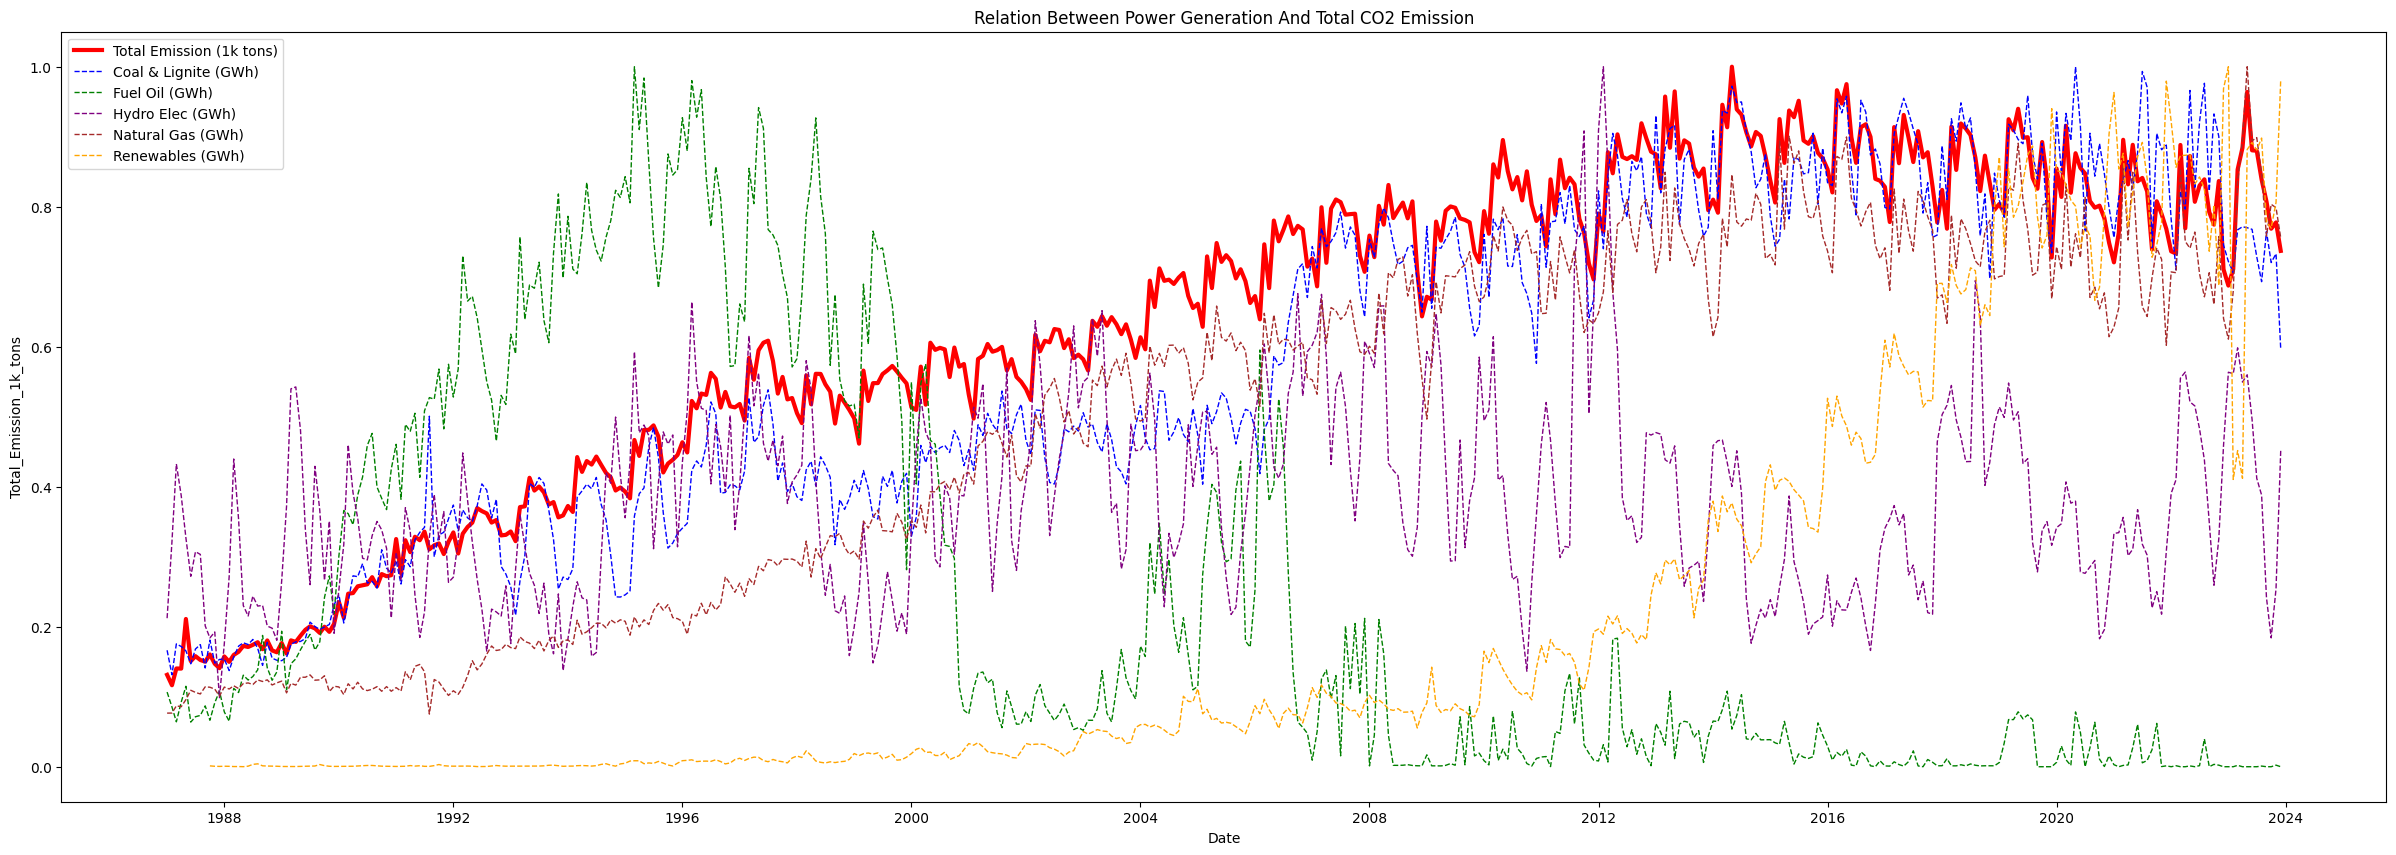

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

sns.lineplot(data=df_scale['Total_Emission_1k_tons'], color='red', linewidth=3, linestyle='-', label='Total Emission (1k tons)')
sns.lineplot(data=df_scale['Coal_Lignite_GWh'], color='blue', linewidth=1, linestyle='--', label='Coal & Lignite (GWh)')
sns.lineplot(data=df_scale['Fuel_Oil_GWh'], color='green', linewidth=1, linestyle='--', label='Fuel Oil (GWh)')
sns.lineplot(data=df_scale['Hydro_Elec_GWh'], color='purple', linewidth=1, linestyle='--', label='Hydro Elec (GWh)')
sns.lineplot(data=df_scale['Natural_Gas_GWh'], color='brown', linewidth=1, linestyle='--', label='Natural Gas (GWh)')
sns.lineplot(data=df_scale['Renewable_GWh'], color='orange', linewidth=1, linestyle='--', label='Renewables (GWh)')
plt.title('Relation Between Power Generation And Total CO2 Emission')
plt.legend()
plt.show()

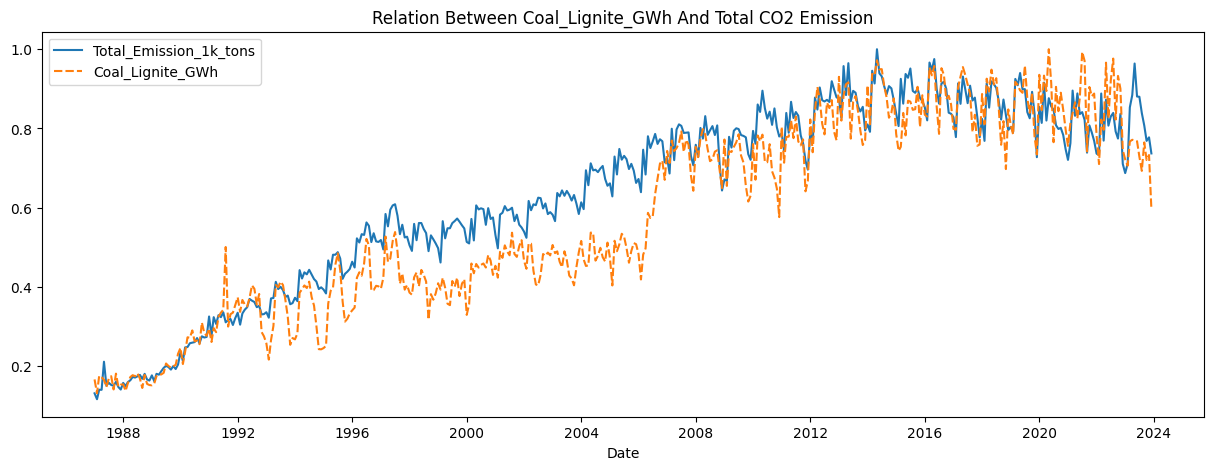

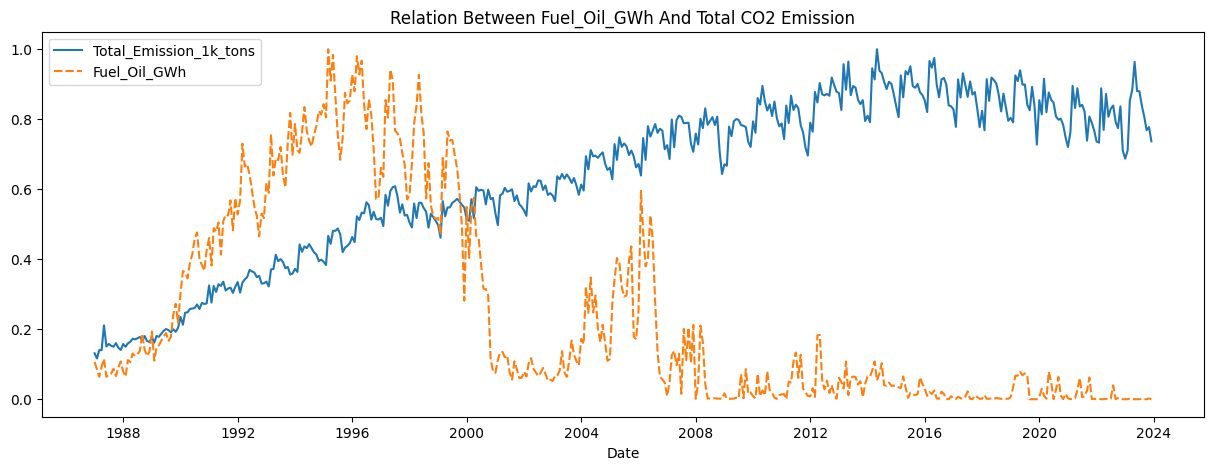

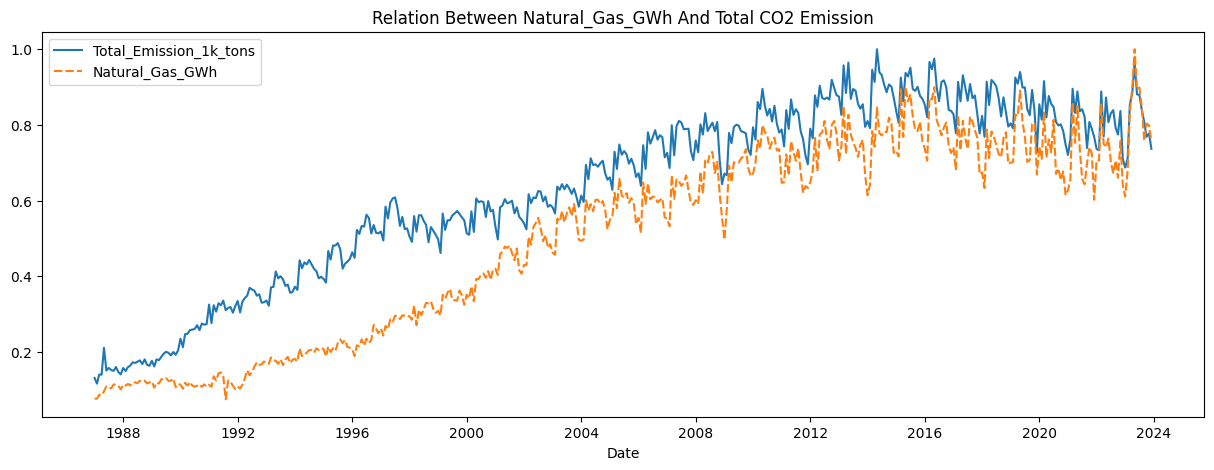

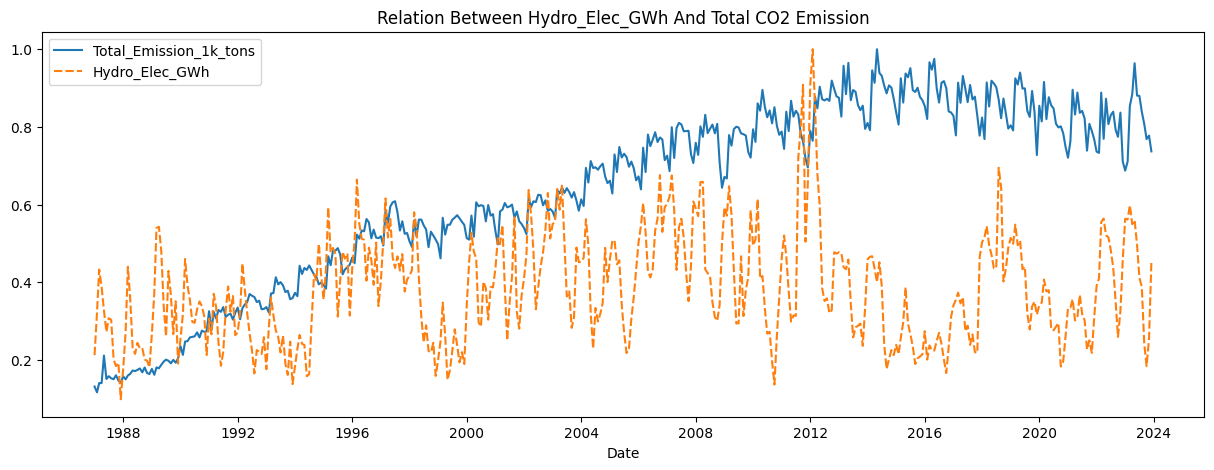

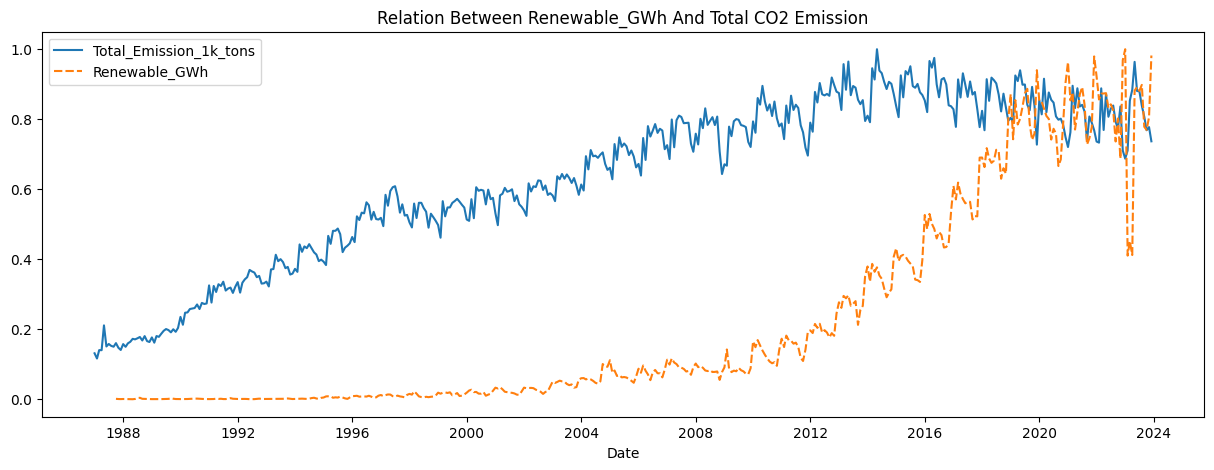

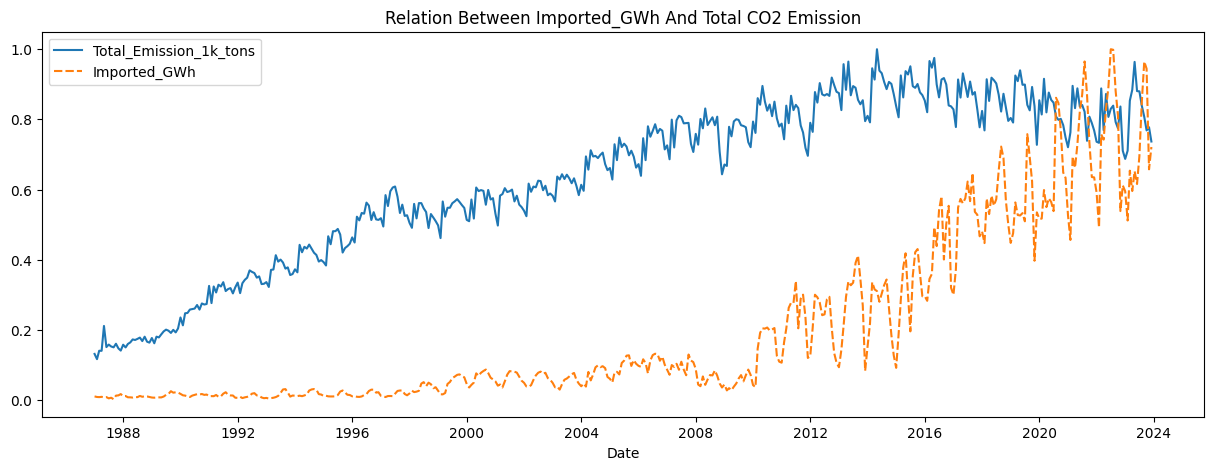

In [37]:

plt.figure(figsize=(15,5))
sns.lineplot(df_scale[['Total_Emission_1k_tons','Coal_Lignite_GWh']])
plt.title('Relation Between Coal_Lignite_GWh And Total CO2 Emission')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(df_scale[['Total_Emission_1k_tons','Fuel_Oil_GWh']])
plt.title('Relation Between Fuel_Oil_GWh And Total CO2 Emission')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(df_scale[['Total_Emission_1k_tons','Natural_Gas_GWh']])
plt.title('Relation Between Natural_Gas_GWh And Total CO2 Emission')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(df_scale[['Total_Emission_1k_tons','Hydro_Elec_GWh']])
plt.title('Relation Between Hydro_Elec_GWh And Total CO2 Emission')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(df_scale[['Total_Emission_1k_tons', 'Renewable_GWh']])
plt.title('Relation Between Renewable_GWh And Total CO2 Emission')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(df_scale[['Total_Emission_1k_tons', 'Imported_GWh']])
plt.title('Relation Between Imported_GWh And Total CO2 Emission')
plt.show()

One-hot encoding 'Month'

In [38]:
merged_df = pd.get_dummies(merged_df, columns=['Month'], drop_first=False)

In [39]:
merged_df.head()

Year  Disel_Oil_m.litres  Fuel_Oil_m.litres  Lignite_1k_ton  \
Date                                                                      
1987-01-01  1987               0.339             59.727         485.682   
1987-02-01  1987               0.295             48.417         394.652   
1987-03-01  1987               0.405             36.248         514.239   
1987-04-01  1987               0.211             52.350         525.096   
1987-05-01  1987               0.291             63.706         519.769   

            Natural_Gas_mmscf  Palm_Oil_m.litres  Coal_Lignite_GWh  \
Date                                                                 
1987-01-01            9173.65                NaN            579.36   
1987-02-01            9276.58                NaN            457.40   
1987-03-01           10733.33                NaN            610.99   
1987-04-01           10543.33                NaN            598.14   
1987-05-01           12024.29                NaN            576.18   

            Diesel_GWh  Fuel_Oil_GWh  Hydro_Elec_GWh  ...  Month_December  \
Date                                                  ...                   
1987-01-01        0.21        227.80          265.68  ...           False   
1987-02-01        0.15        182.33          402.57  ...           False   
1987-03-01        0.57        137.06          541.60  ...           False   
1987-04-01        0.17        197.22          485.04  ...           False   
1987-05-01        0.20        245.44          409.23  ...           False   

            Month_February  Month_January  Month_July  Month_June  \
Date                                                                
1987-01-01           False           True       False       False   
1987-02-01            True          False       False       False   
1987-03-01           False          False       False       False   
1987-04-01           False          False       False       False   
1987-05-01           False          False       False       False   

            Month_March  Month_May  Month_November  Month_October  \
Date                                                                
1987-01-01        False      False           False          False   
1987-02-01        False      False           False          False   
1987-03-01         True      False           False          False   
1987-04-01        False      False           False          False   
1987-05-01        False       True           False          False   

            Month_September  
Date                         
1987-01-01            False  
1987-02-01            False  
1987-03-01            False  
1987-04-01            False  
1987-05-01            False  

[5 rows x 29 columns]

<Axes: >

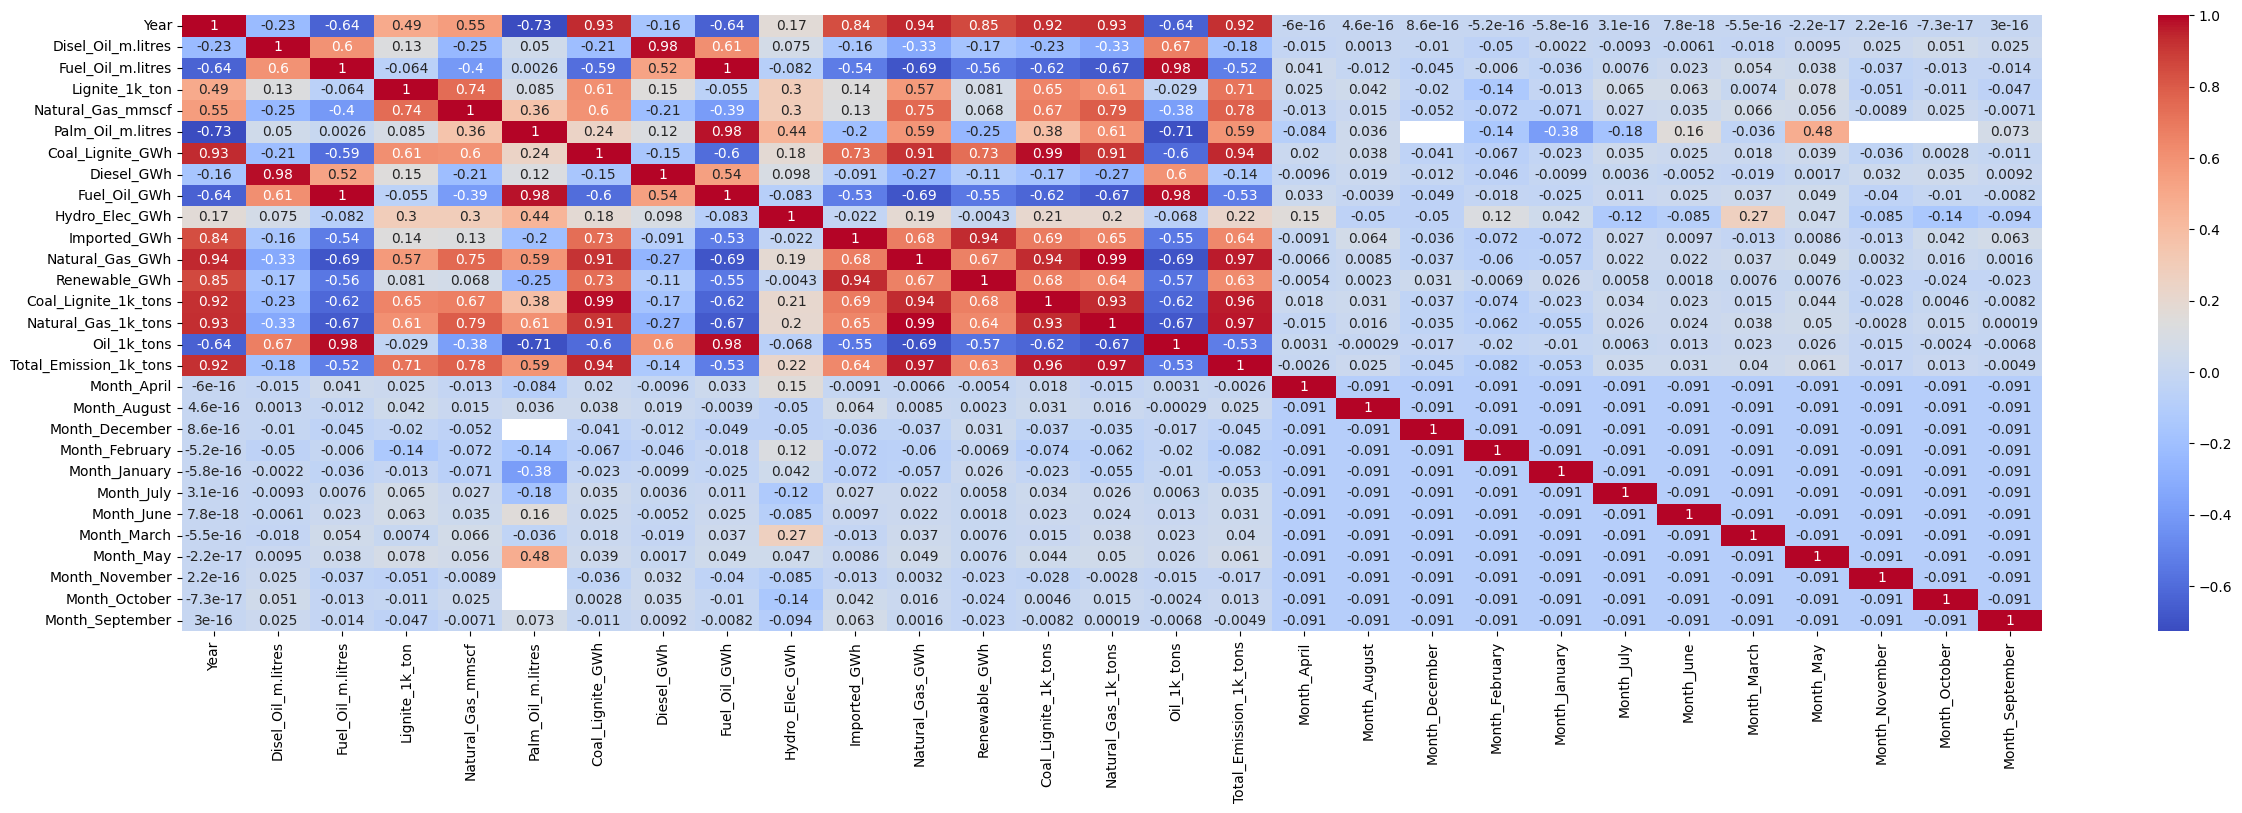

In [40]:
# Heat Map(Normal)
plt.figure(figsize=(30, 8))
sns.heatmap(merged_df.corr(), annot = True, cmap = 'coolwarm')

<Axes: >

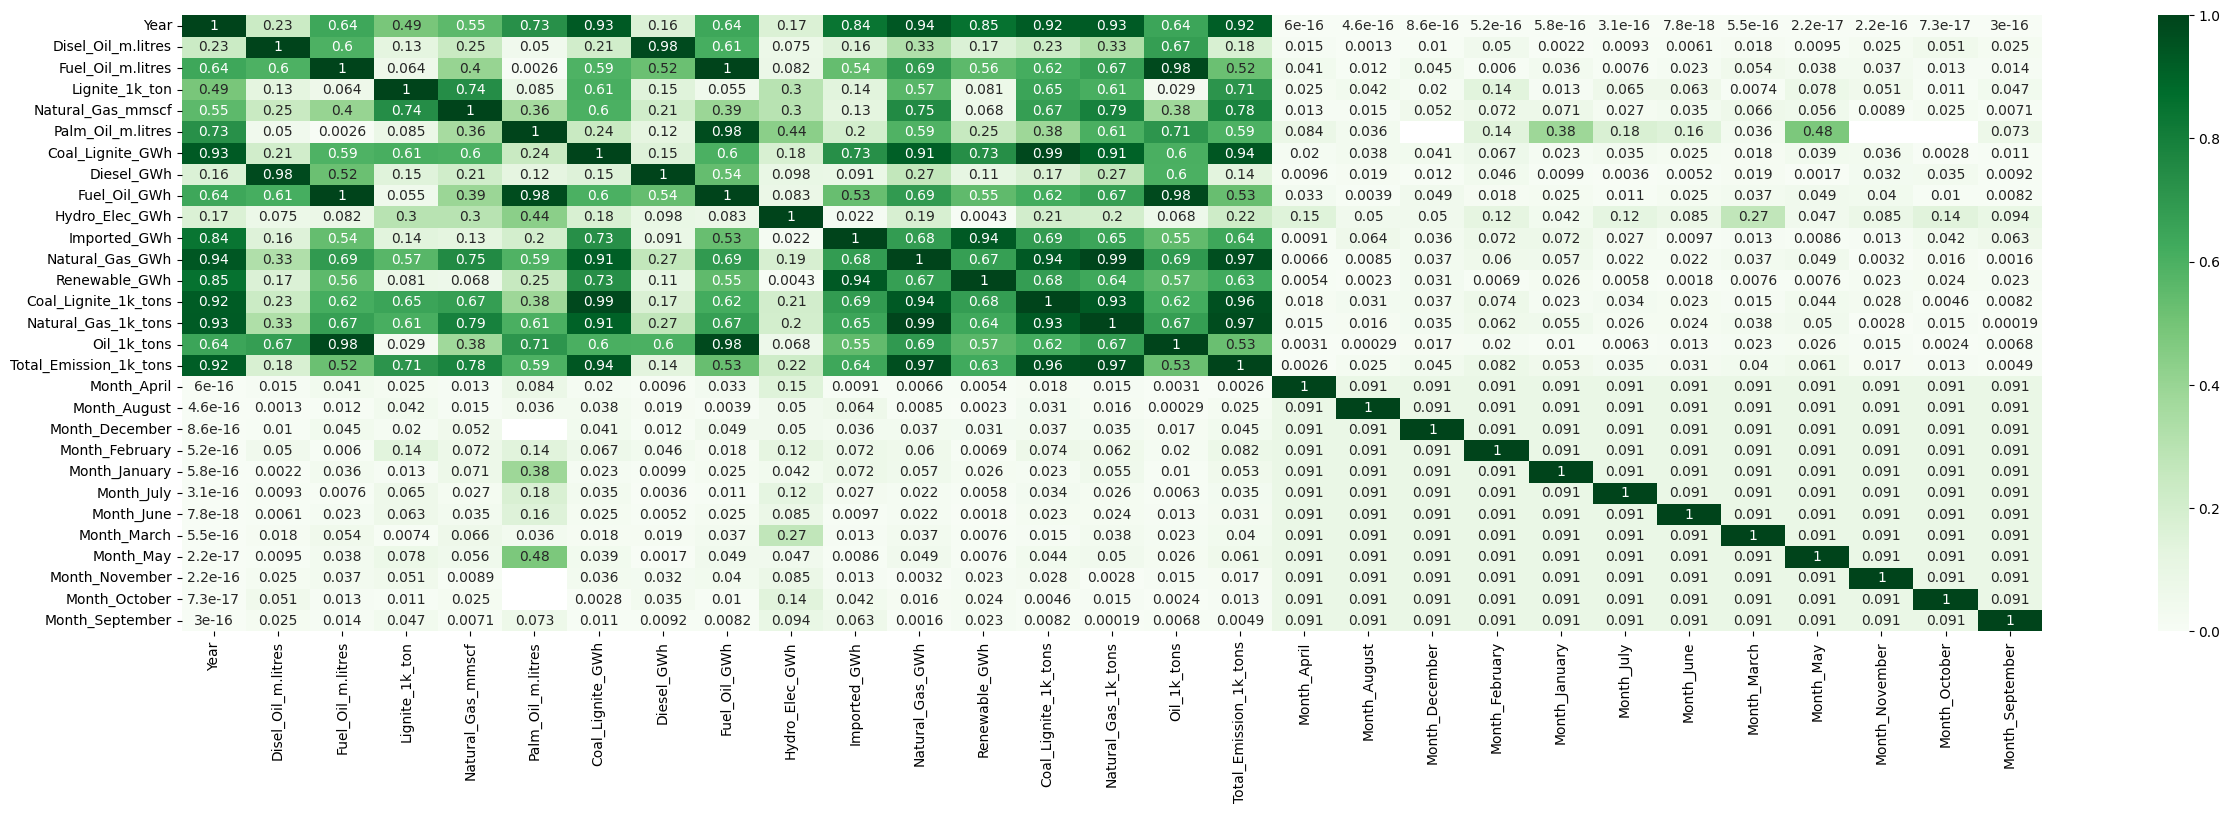

In [41]:
# Heat Map (Absolute)
plt.figure(figsize=(30, 8))
sns.heatmap(merged_df.corr().abs(), annot = True, cmap = 'Greens')

In [42]:
# Table Correlation
corr_matrix = merged_df.corr()

# Target variable
target_corr = corr_matrix['Total_Emission_1k_tons']

target_corr_sorted_desc = target_corr.sort_values(ascending=False)

print("Correlation with 'Total_Emission_1k_tons'")
print(target_corr_sorted_desc)

Correlation with 'Total_Emission_1k_tons'
Total_Emission_1k_tons    1.000000
Natural_Gas_1k_tons       0.972873
Natural_Gas_GWh           0.965575
Coal_Lignite_1k_tons      0.963981
Coal_Lignite_GWh          0.943937
Year                      0.921364
Natural_Gas_mmscf         0.778577
Lignite_1k_ton            0.714436
Imported_GWh              0.638813
Renewable_GWh             0.628458
Palm_Oil_m.litres         0.594537
Hydro_Elec_GWh            0.219723
Month_May                 0.061029
Month_March               0.039734
Month_July                0.035017
Month_June                0.030874
Month_August              0.024797
Month_October             0.012633
Month_April              -0.002589
Month_September          -0.004880
Month_November           -0.017080
Month_December           -0.045261
Month_January            -0.052654
Month_February           -0.081618
Diesel_GWh               -0.135431
Disel_Oil_m.litres       -0.182065
Fuel_Oil_m.litres        -0.523106
Oil_1k_tons  

In [43]:
# Table Correlation (Absolute)
target_corr_abs_sorted_desc = target_corr.abs().sort_values(ascending=False)

print("Absolute Correlation with 'Total_Emission_1k_tons'")
print(target_corr_abs_sorted_desc)

Absolute Correlation with 'Total_Emission_1k_tons'
Total_Emission_1k_tons    1.000000
Natural_Gas_1k_tons       0.972873
Natural_Gas_GWh           0.965575
Coal_Lignite_1k_tons      0.963981
Coal_Lignite_GWh          0.943937
Year                      0.921364
Natural_Gas_mmscf         0.778577
Lignite_1k_ton            0.714436
Imported_GWh              0.638813
Renewable_GWh             0.628458
Palm_Oil_m.litres         0.594537
Fuel_Oil_GWh              0.527767
Oil_1k_tons               0.525866
Fuel_Oil_m.litres         0.523106
Hydro_Elec_GWh            0.219723
Disel_Oil_m.litres        0.182065
Diesel_GWh                0.135431
Month_February            0.081618
Month_May                 0.061029
Month_January             0.052654
Month_December            0.045261
Month_March               0.039734
Month_July                0.035017
Month_June                0.030874
Month_August              0.024797
Month_November            0.017080
Month_October             0.012633
Mont

## 5. Feature Selection

In [44]:
merged_df.columns

Index(['Year', 'Disel_Oil_m.litres', 'Fuel_Oil_m.litres', 'Lignite_1k_ton',
       'Natural_Gas_mmscf', 'Palm_Oil_m.litres', 'Coal_Lignite_GWh',
       'Diesel_GWh', 'Fuel_Oil_GWh', 'Hydro_Elec_GWh', 'Imported_GWh',
       'Natural_Gas_GWh', 'Renewable_GWh', 'Coal_Lignite_1k_tons',
       'Natural_Gas_1k_tons', 'Oil_1k_tons', 'Total_Emission_1k_tons',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September'],
      dtype='object')

In [45]:
features = ['Coal_Lignite_GWh', 'Fuel_Oil_GWh', 'Hydro_Elec_GWh', 'Natural_Gas_GWh', 'Renewable_GWh', 
            'Month_April', 'Month_August', 'Month_December', 'Month_February','Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September']
target = 'Total_Emission_1k_tons'

X = merged_df[features]
y = merged_df[target]

In [46]:
#X and y should have the same number of rows
X.shape, y.shape

((444, 17), (444,))

In [47]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### Splitting before preprocessing

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#X and y should have the same number of rows
X_train.shape, X_test.shape

((355, 17), (89, 17))

In [50]:
y_train.shape, y_test.shape

((355,), (89,))

## 6. Preprocessing

### 1) Check null values

In [51]:
X_train.isna().sum()

Coal_Lignite_GWh    0
Fuel_Oil_GWh        0
Hydro_Elec_GWh      0
Natural_Gas_GWh     0
Renewable_GWh       8
Month_April         0
Month_August        0
Month_December      0
Month_February      0
Month_January       0
Month_July          0
Month_June          0
Month_March         0
Month_May           0
Month_November      0
Month_October       0
Month_September     0
dtype: int64

In [52]:
X_test.isna().sum()

Coal_Lignite_GWh    0
Fuel_Oil_GWh        0
Hydro_Elec_GWh      0
Natural_Gas_GWh     0
Renewable_GWh       1
Month_April         0
Month_August        0
Month_December      0
Month_February      0
Month_January       0
Month_July          0
Month_June          0
Month_March         0
Month_May           0
Month_November      0
Month_October       0
Month_September     0
dtype: int64

In [53]:
X_train.fillna(0, inplace=True)

In [54]:
X_test.fillna(0, inplace=True)

In [55]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

In [56]:
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

In [57]:
X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()

### 2) Unit Test

In [58]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

### 3) Scaling

In [59]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7. Model Selection

In [60]:
# Use cross-validation to find the best algorithm before doing GridSearch
# Models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Algorithms
algorithms = [linear_model, rf_model, gb_model]
algorithm_names = ['linear_regression', 'random_forest', 'gradient_boosting']

for i,model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score:{scores} - Mean Score{scores.mean()}")

linear_regression - Score:[-31029.13282752 -49404.3881202  -36178.13973535 -49336.62705363
 -43317.16291949] - Mean Score-41853.09013123863
random_forest - Score:[-40744.47667495 -41355.28194339 -44655.2558028  -59202.56858077
 -39035.68749119] - Mean Score-44998.65409862075
gradient_boosting - Score:[-28174.46326497 -32985.16818742 -36915.76671222 -41193.23619527
 -35975.980739  ] - Mean Score-35048.92301977392


In [61]:
# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, 
                             param_grid=param_grid, 
                             cv=kf,
                             scoring='neg_mean_squared_error')

In [62]:
grid_search.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [63]:
print("Best Estimetor:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Estimetor: GradientBoostingRegressor(max_depth=4, min_samples_split=10, random_state=42,
                          subsample=0.8)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Score: -33253.312485953786


### Testing

In [64]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_test = y_test
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE):{mse}')
print(f'Root Mean Squared Error (RMSE):{rmse}')
print(f'R^2:{r2}')

Mean Squared Error (MSE):39989.47255795719
Root Mean Squared Error (RMSE):199.97367966299262
R^2:0.9923698567417572


<Axes: xlabel='Total_Emission_1k_tons'>

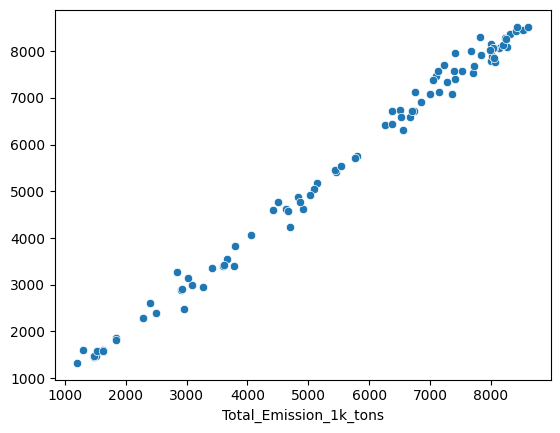

In [65]:
sns.scatterplot(x = y_test, y = y_pred)

<Axes: xlabel='Total_Emission_1k_tons'>

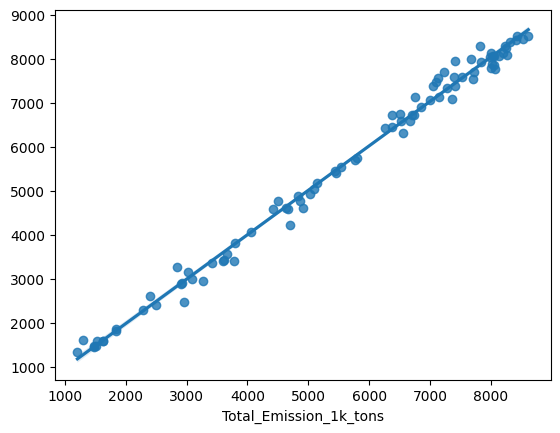

In [66]:
sns.regplot(y = y_pred, x = y_test)

## 8. Analysis

In [67]:
best_model.feature_importances_

array([4.99029842e-02, 1.15258585e-02, 7.73172748e-04, 9.19941091e-01,
       1.66036309e-02, 1.02395011e-04, 4.72729030e-05, 8.39179285e-05,
       5.78133030e-04, 1.67772619e-04, 2.50880147e-05, 3.87854925e-05,
       1.47210491e-05, 1.56316145e-04, 1.25727256e-05, 2.20426621e-05,
       4.24462780e-06])

<BarContainer object of 17 artists>

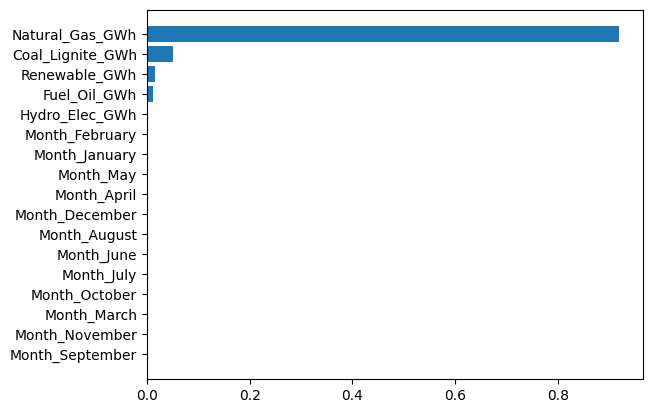

In [68]:
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], best_model.feature_importances_[sorted_idx])

## 9. Inference

In [69]:
import pickle

filename = 'CO2Predicting'
pickle.dump(best_model, open(filename, 'wb'))

In [70]:
with open('scaler_standard.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [71]:
with open('merged_df_encoded.pkl', 'wb') as f:
    pickle.dump(merged_df, f)

In [72]:
loaded_model = pickle.load(open(filename, 'rb'))

In [73]:
print(loaded_model)

GradientBoostingRegressor(max_depth=4, min_samples_split=10, random_state=42,
                          subsample=0.8)


In [81]:
sample = merged_df[['Coal_Lignite_GWh', 'Fuel_Oil_GWh', 'Hydro_Elec_GWh', 
                    'Natural_Gas_GWh', 'Renewable_GWh', 
                    'Month_April', 'Month_August', 'Month_December', 
                    'Month_February','Month_January', 'Month_July', 
                    'Month_June', 'Month_March', 'Month_May', 
                    'Month_November', 'Month_October', 'Month_September']].iloc[15]

sample

Coal_Lignite_GWh     599.86
Fuel_Oil_GWh         226.39
Hydro_Elec_GWh       442.62
Natural_Gas_GWh     1478.56
Renewable_GWh          0.54
Month_April            True
Month_August          False
Month_December        False
Month_February        False
Month_January         False
Month_July            False
Month_June            False
Month_March           False
Month_May             False
Month_November        False
Month_October         False
Month_September       False
Name: 1988-04-01 00:00:00, dtype: object

In [82]:
sample_np = np.array([[
    sample['Coal_Lignite_GWh'], sample['Fuel_Oil_GWh'], sample['Hydro_Elec_GWh'], 
    sample['Natural_Gas_GWh'], sample['Renewable_GWh'], 
    sample['Month_April'], sample['Month_August'], sample['Month_December'], 
    sample['Month_February'], sample['Month_January'], sample['Month_July'], 
    sample['Month_June'], sample['Month_March'], sample['Month_May'], 
    sample['Month_November'], sample['Month_October'], sample['Month_September']
]])

sample_df = pd.DataFrame(sample_np, columns=['Coal_Lignite_GWh', 'Fuel_Oil_GWh', 'Hydro_Elec_GWh', 
                                             'Natural_Gas_GWh', 'Renewable_GWh', 
                                             'Month_April', 'Month_August', 'Month_December', 
                                             'Month_February','Month_January', 'Month_July', 
                                             'Month_June', 'Month_March', 'Month_May', 
                                             'Month_November', 'Month_October', 'Month_September'])

sample_df = sample_df.fillna(0)

sample_np_scaled = scaler.transform(sample_df)

#To predict
predicted_price = loaded_model.predict(sample_np_scaled)
predicted_price

array([1475.27973717])

In [83]:
actual_price = merged_df[['Total_Emission_1k_tons']].iloc[15]
actual_price

Total_Emission_1k_tons    1505.2
Name: 1988-04-01 00:00:00, dtype: float64